# KNN - K Nearest Neighbors - Classification

## Imports

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/gene_expression.csv')

In [107]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

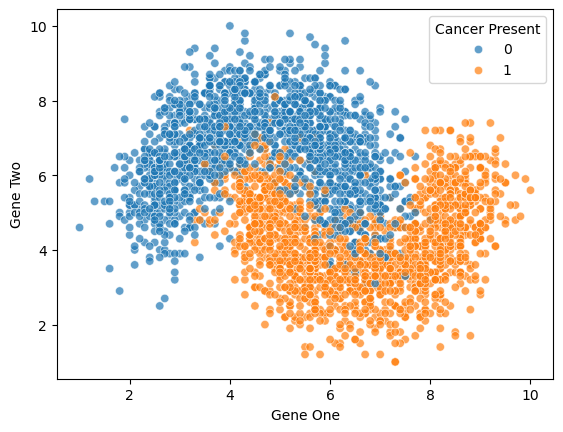

In [47]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

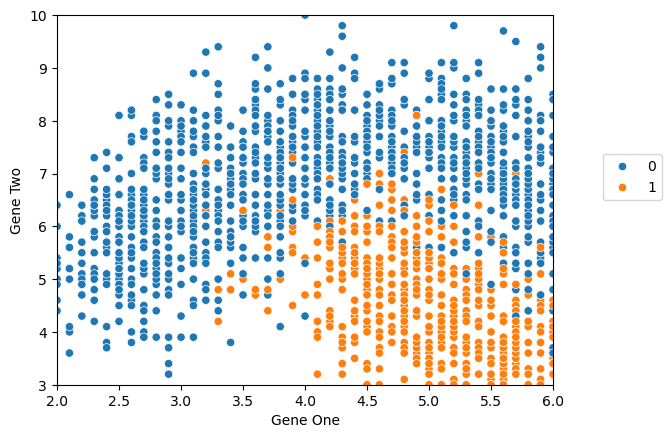

In [48]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

## Train|Test Split and Scaling Data

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
scaler = StandardScaler()

In [53]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=9)

In [56]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

## Model Evaluation

In [57]:
y_pred = knn_model.predict(scaled_X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [59]:
accuracy_score(y_test, y_pred)

0.9422222222222222

In [60]:
confusion_matrix(y_test,y_pred)

array([[446,  24],
       [ 28, 402]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



## Elbow Method for Choosing Reasonable K Values
#### NOTE: This uses the test set for the hyperparameter selection of K.

In [62]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

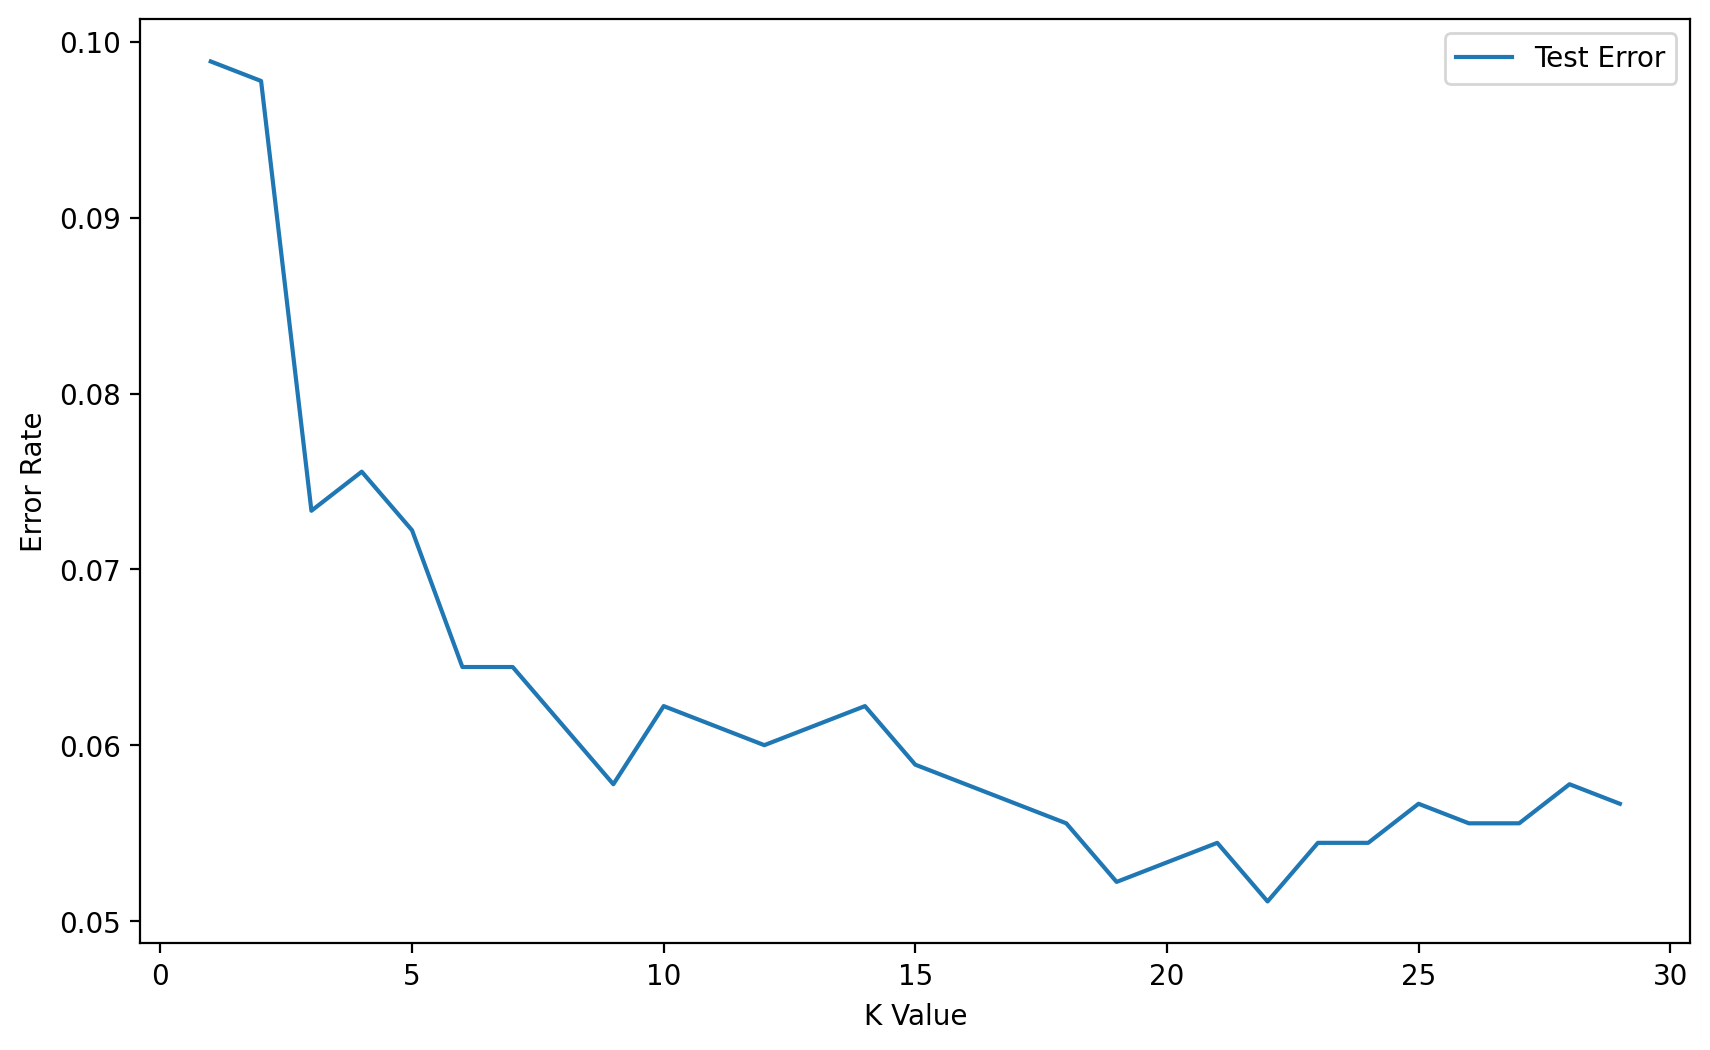

In [63]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

# Another Dataset

In [64]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/sonar.all-data.csv')

In [65]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [66]:
df.columns

Index(['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7',
       'Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13',
       'Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19',
       'Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25',
       'Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31',
       'Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37',
       'Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43',
       'Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49',
       'Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55',
       'Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60', 'Label'],
      dtype='object')

In [67]:
df['Label'].unique()

array(['R', 'M'], dtype=object)

In [68]:
df['Label'] = df['Label'].map({'R': 0, 'M': 1})

In [69]:
df['Label'].unique()

array([0, 1], dtype=int64)

## Train and Split

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
X = df.drop('Label', axis=1)
y = df['Label']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
scaler = StandardScaler()

In [74]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [77]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Model Evaluation

In [78]:
y_pred = knn_model.predict(scaled_X_test)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [80]:
accuracy_score(y_test, y_pred)

0.9365079365079365

In [81]:
confusion_matrix(y_test, y_pred)

array([[27,  1],
       [ 3, 32]], dtype=int64)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.97      0.91      0.94        35

    accuracy                           0.94        63
   macro avg       0.93      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



## Using grid search to understand the best performing parameters

In [83]:
from sklearn.model_selection import train_test_split 

In [85]:
X = df.drop(['Label'],axis=1)
y = df['Label']

In [86]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### TASK: Create a PipeLine that contains both a StandardScaler and a KNN model

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [88]:
scaler = StandardScaler()

In [89]:
knn = KNeighborsClassifier()

In [90]:
operations = [('scaler',scaler),('knn',knn)]

In [91]:
from sklearn.pipeline import Pipeline

In [92]:
pipe = Pipeline(operations)

#### TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
k_values = list(range(1,30))

In [96]:
param_grid = {'knn__n_neighbors': k_values}

In [97]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [98]:
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [99]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [100]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.84537696, 0.83485064, 0.77524893, 0.76486486, 0.75931721,
       0.75974395, 0.75945946, 0.74352774, 0.7113798 , 0.73812233,
       0.70042674, 0.72759602, 0.68449502, 0.70085349, 0.69530583,
       0.69544808, 0.7113798 , 0.71678521, 0.72204836, 0.71664296,
       0.70071124, 0.69544808, 0.69530583, 0.69004267, 0.68477952,
       0.6688478 , 0.67411095, 0.67411095, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

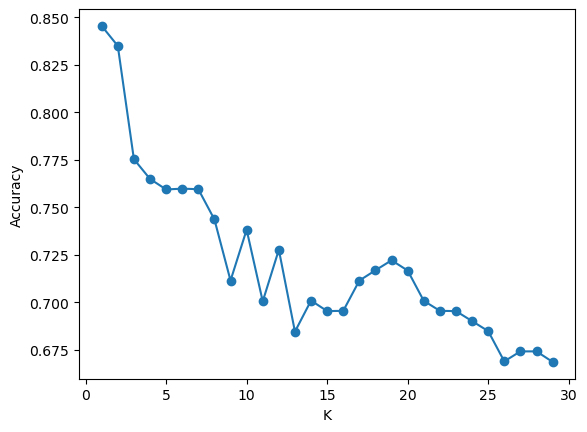

In [101]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [102]:
pred = full_cv_classifier.predict(X_test)

In [103]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [104]:
confusion_matrix(y_test,pred)

array([[ 7,  1],
       [ 1, 12]], dtype=int64)

In [105]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### Trying this grid search on gene dataset

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [109]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [110]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [112]:
scaler = StandardScaler()

In [113]:
knn = KNeighborsClassifier()

In [114]:
operations = [('scaler',scaler),('knn',knn)]

In [115]:
from sklearn.pipeline import Pipeline

In [116]:
pipe = Pipeline(operations)

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
k_values = list(range(1,30))

In [119]:
param_grid = {'knn__n_neighbors': k_values}

In [120]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [121]:
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [122]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=23))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=23),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 23,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Text(0, 0.5, 'Accuracy')

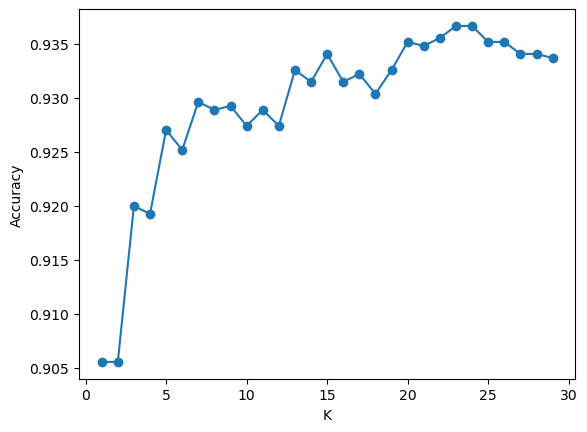

In [123]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [124]:
pred = full_cv_classifier.predict(X_test)

In [125]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [128]:
accuracy_score(y_test, pred)

0.9366666666666666

In [126]:
confusion_matrix(y_test,pred)

array([[156,   7],
       [ 12, 125]], dtype=int64)

In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       163
           1       0.95      0.91      0.93       137

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300

